In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# General tools

import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# For validation
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings

# For validation

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import pydot
from sklearn.tree import export_graphviz
from io import StringIO

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
races_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
constructor_results_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv')
drivers_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
constructors_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv')
lap_times_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv')
status_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/status.csv')
driver_standings_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
seasons_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv')
pit_stops_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv')
sprint_results_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv')
constructor_standings_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv')
results_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
circuits_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
qualifying_df=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')

#  What is the main distribution of the constructor's nationality?

<Axes: title={'center': "Main distribution of the constructor's nationality"}>

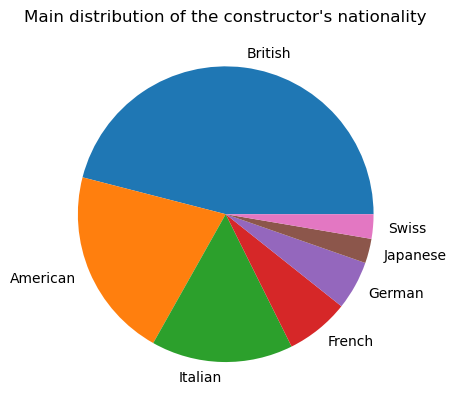

In [3]:
constructor_nationality=constructors_df.nationality.value_counts()
constructor_nationality.loc[constructor_nationality>3].plot.pie(title="Main distribution of the constructor's nationality",ylabel='')
#constructor_nationality.plot.pie()

#  What is the main distribution of the driver's nationality?

<Axes: title={'center': "Main distribution of the driver's nationality"}>

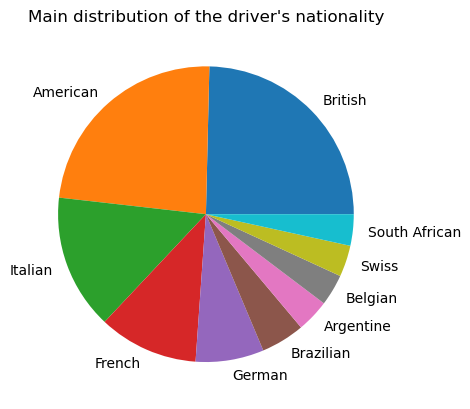

In [4]:
drivers_nationality=drivers_df.nationality.value_counts()
drivers_nationality.loc[drivers_nationality>20].plot.pie(title="Main distribution of the driver's nationality",ylabel='')

**we can see the connection when there are many constructors from one country there are also  many drivers representing this country and the opposite way.**

# 	Which circuit is the most repeated over the years?

<Axes: >

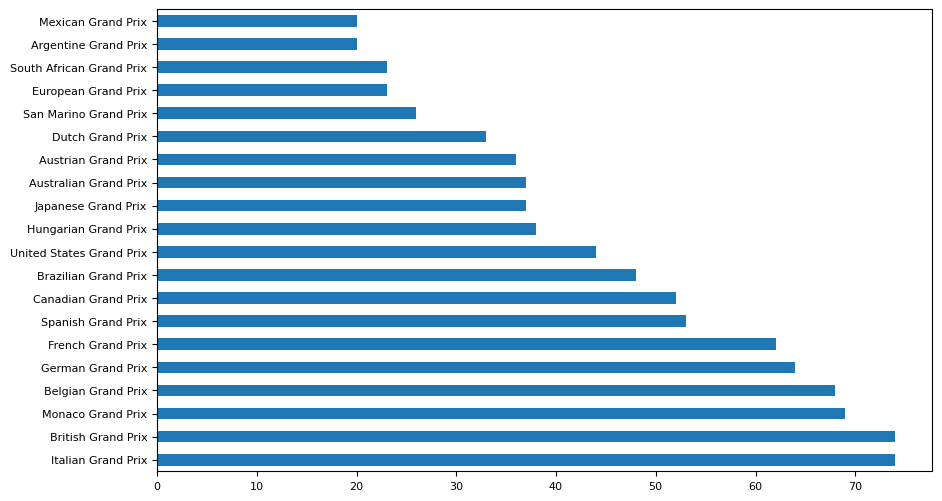

In [5]:

most_repeated_circuits=races_df['name'].value_counts().sort_values(ascending=False).head(20)
most_repeated_circuits
most_repeated_circuits.plot.barh(rot=0,fontsize=8,figsize=(10,6))

1. Italian Grand Prix is in "Monza" circuit
1. Monaco Grand Prix is in "Monaco" circuit**
1. British Grand Prix is in "silverstone" circuit**
1. Belgian Grand Prix is in "Spa" circuit**
1. Canadian Grand Prix is in "villeneuve"(Montreal) circuit**




# 	Progress of the fastest laps( in specific 5 most repeated circuits)  of the winners in those circuits races over the years.

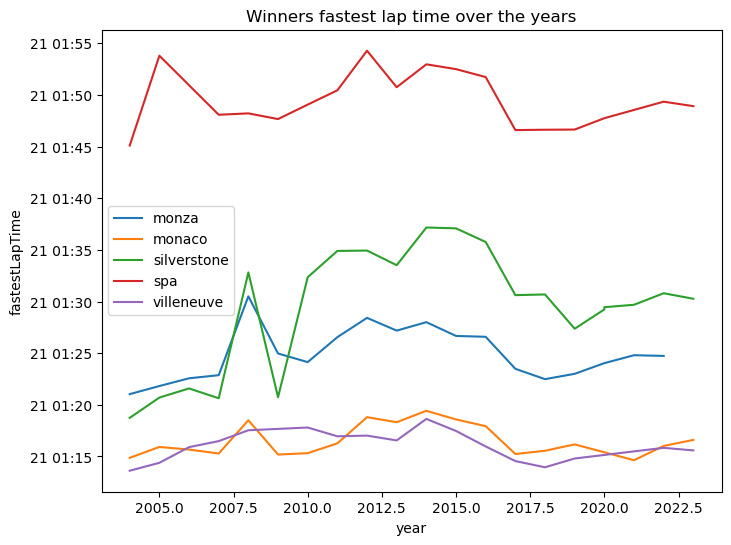

In [6]:
import matplotlib.pyplot as plt
merge1=pd.merge(results_df, races_df, on ='raceId')
merge1=merge1[merge1['fastestLapTime']!='\\N']
merge1['fastestLapTime']=pd.to_datetime(merge1['fastestLapTime'])

monza=merge1.loc[(merge1['position']=='1') & (merge1['circuitId']==14)][['fastestLapTime','year','circuitId']]
sorted_monza=monza.sort_values(by='year')
monaco=merge1.loc[(merge1['position']=='1') & (merge1['circuitId']==6)][['fastestLapTime','year','circuitId']]
sorted_monaco=monaco.sort_values(by='year')
silverstone=merge1.loc[(merge1['position']=='1') & (merge1['circuitId']==9)][['fastestLapTime','year','circuitId']]
sorted_silverstone=silverstone.sort_values(by='year')
spa=merge1.loc[(merge1['position']=='1') & (merge1['circuitId']==13)][['fastestLapTime','year','circuitId']]
sorted_spa=spa.sort_values(by='year')
villeneuve=merge1.loc[(merge1['position']=='1') & (merge1['circuitId']==7)][['fastestLapTime','year','circuitId']]
sorted_villeneuve=villeneuve.sort_values(by='year')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sorted_monza['year'], sorted_monza['fastestLapTime'], label='monza')
ax.plot(sorted_monaco['year'], sorted_monaco['fastestLapTime'], label='monaco')
ax.plot(sorted_silverstone['year'], sorted_silverstone['fastestLapTime'], label='silverstone')
ax.plot(sorted_spa['year'], sorted_spa['fastestLapTime'], label='spa')
ax.plot(sorted_villeneuve['year'], sorted_villeneuve['fastestLapTime'], label='villeneuve')
ax.set_xlabel('year')
ax.set_ylabel('fastestLapTime')
ax.set_title('Winners fastest lap time over the years')
ax.legend(loc='center left')
plt.show()

**we can insight from the above graph that around 2008~2015 probably, a combine of regulations changes made the all cars of any constructor slower on the the all 5 circuits.**

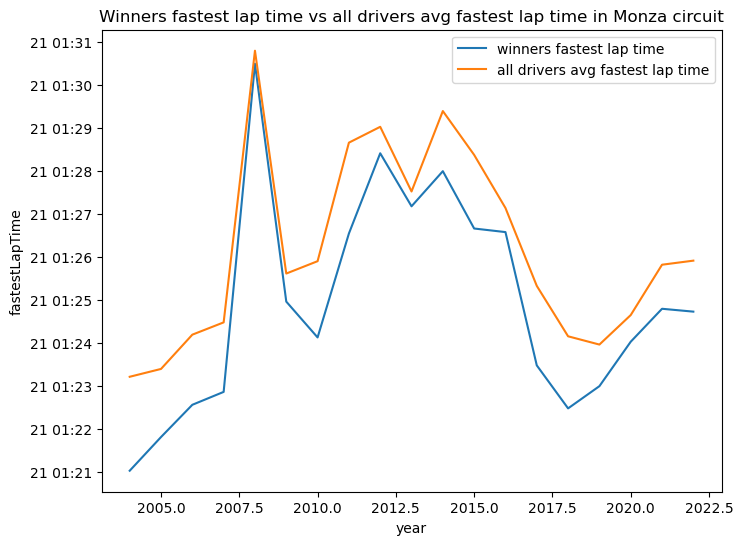

In [7]:
import matplotlib.pyplot as plt
merge1=pd.merge(results_df, races_df, on ='raceId')
merge1=merge1[merge1['fastestLapTime']!='\\N']
merge1['fastestLapTime']=pd.to_datetime(merge1['fastestLapTime'])

monza=merge1.loc[(merge1['position']=='1') & (merge1['circuitId']==14)][['fastestLapTime','year','circuitId']]
sorted_monza=monza.sort_values(by='year')

monza_avg=merge1.loc[merge1['circuitId']==14][['fastestLapTime','year']]
monza_avg2=monza_avg.groupby('year')['fastestLapTime'].mean().to_frame()
monza_avg2=monza_avg2.reset_index().rename(columns={'index':'index'})

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sorted_monza['year'], sorted_monza['fastestLapTime'], label='winners fastest lap time')
ax.plot(monza_avg2['year'], monza_avg2['fastestLapTime'], label='all drivers avg fastest lap time')
ax.set_xlabel('year')
ax.set_ylabel('fastestLapTime')
ax.set_title('Winners fastest lap time vs all drivers avg fastest lap time in Monza circuit')
ax.legend(loc='upper right')
plt.show()

**** we can compare how much faster the winners fastest laps were against the others fastest laps in Monza circuit races in 2005-2022****

# Which driver had the most time p1 for race after qualifying?( most times qualifying rank number 1 ) 

In [8]:
vc=qualifying_df[qualifying_df['position']==1]['driverId'].value_counts().to_frame().rename(columns={'driverId':'P1 times'})
vc=vc.reset_index().rename(columns={'index':'driverId'})
vc.merge(drivers_df,on='driverId').head(5)

,driverId,P1 times,driverRef,number,code,forename,surname,dob,nationality,url
0,1,107,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,20,57,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,30,36,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
3,3,30,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,830,28,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


# Who is the driver with the highest number of winnings in F1 history? 

In [9]:
vc=driver_standings_df[driver_standings_df['position']==1]['driverId'].value_counts().to_frame().rename(columns={'driverId':'wins'})
vc=vc.reset_index().rename(columns={'index':'driverId'})
vc.merge(drivers_df,on='driverId')


,driverId,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,1,125,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,30,121,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
2,117,79,prost,\N,\N,Alain,Prost,1955-02-24,French,http://en.wikipedia.org/wiki/Alain_Prost
3,20,63,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,4,52,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
...,...,...,...,...,...,...,...,...,...,...
57,554,1,behra,\N,\N,Jean,Behra,1921-02-16,French,http://en.wikipedia.org/wiki/Jean_Behra
58,577,1,musso,\N,\N,Luigi,Musso,1924-07-28,Italian,http://en.wikipedia.org/wiki/Luigi_Musso
59,341,1,surtees,\N,\N,John,Surtees,1934-02-11,British,http://en.wikipedia.org/wiki/John_Surtees
60,385,1,bandini,\N,\N,Lorenzo,Bandini,1935-12-21,Italian,http://en.wikipedia.org/wiki/Lorenzo_Bandini


# Which country has the most f1 circuits? 

In [10]:
vc=circuits_df['country'].value_counts().to_frame().rename(columns={'country':'circuits_num'})
vc=vc.reset_index().rename(columns={'index':'country'})
vc

,country,circuits_num
0,USA,11
1,France,7
2,Spain,6
3,Portugal,4
4,UK,4
5,Italy,4
6,Japan,3
7,Canada,3
8,Germany,3
9,Belgium,3


/tmp/ipykernel_20/2082402286.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


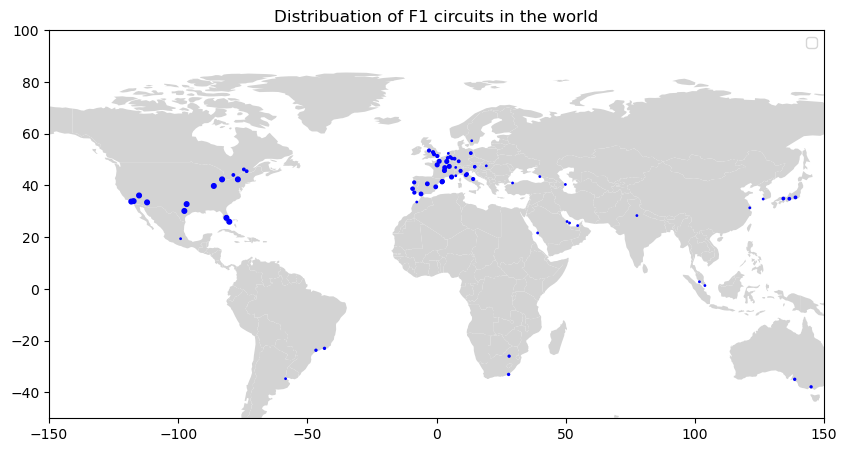

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

merge1=pd.merge(vc, circuits_df, on ='country')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')
scatter=ax.scatter(merge1['lng'],merge1['lat'], color='blue', marker='o', s=merge1['circuits_num'])
ax.set_title('Distribuation of F1 circuits in the world')
ax.legend()
ax.set_xlim(-150, 150)  
ax.set_ylim(-50, 100)     
plt.show()

# Which race had the most overall drivers pit stops ? 

In [12]:
highest_pitstops_num=pit_stops_df.groupby('raceId')['stop'].sum().sort_values().to_frame()
merge1=pd.merge(highest_pitstops_num, races_df, on ='raceId')
merge2=pd.merge(merge1, circuits_df, on ='circuitId')
selected_columns=['raceId','stop','circuitId','circuitRef','country']
merge2[selected_columns].sort_values(by='stop').set_index('raceId')

,stop,circuitId,circuitRef,country
raceId,,,,
1009,19,24,yas_marina,UAE
1102,20,79,miami,USA
1056,20,6,monaco,Monaco
1075,21,77,jeddah,Saudi Arabia
941,21,71,sochi,Russia
...,...,...,...,...
1020,214,10,hockenheimring,Germany
851,221,11,hungaroring,Hungary
970,228,17,shanghai,China


# 	What are the most common F1 races\circuits with the highest number of accidents over the years? 

<Axes: xlabel='name'>

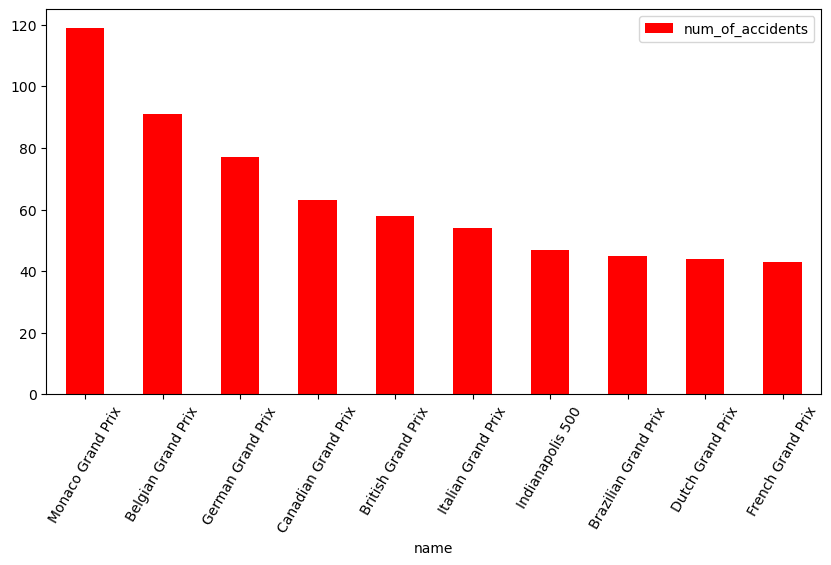

In [13]:
vc=results_df.loc[results_df['statusId']==3]['raceId'].value_counts().sort_values().to_frame().rename(columns={'raceId':'num_of_accidents'})
vc=vc.reset_index().rename(columns={'index':'raceId'})
merge1=pd.merge(vc, races_df, on ='raceId')
total_accidents=merge1[['raceId','num_of_accidents','name','circuitId']]
total_accidents.groupby('name')['num_of_accidents'].sum().sort_values(ascending=False).to_frame().head(10).plot.bar(color='red',rot=60,figsize=(10,5))

**Monaco circuit is known for his density and difficulty**

# 	Who are the leading constructors in the history?

In [14]:
total_points=constructor_standings_df.groupby('constructorId').max('points')
merge2=pd.merge(total_points,constructors_df,on='constructorId')
merge2.set_index='constructorId'
merge3=merge2[['constructorId','points','constructorRef']].sort_values(by='points',ascending=False).head(10)
merge3.reset_index()

#tried to show it by decades but the point counting is continual so it's not reseting every decade.
#for example, if constructor is older than another but he gain in specific decade less than
#is competitors he can be with more points because he raced in more races and gained more points.

,index,constructorId,points,constructorRef
0,109,131,765.0,mercedes
1,8,9,759.0,red_bull
2,5,6,571.0,ferrari
3,0,1,497.0,mclaren
4,2,3,320.0,williams
5,153,208,315.0,lotus_f1
6,3,4,206.0,renault
7,103,117,196.0,aston_martin
8,156,211,195.0,racing_point
9,9,10,187.0,force_india


# 	What is the distribution of the races winners fastest lap number?

<Axes: xlabel='fastestLap', ylabel='count'>

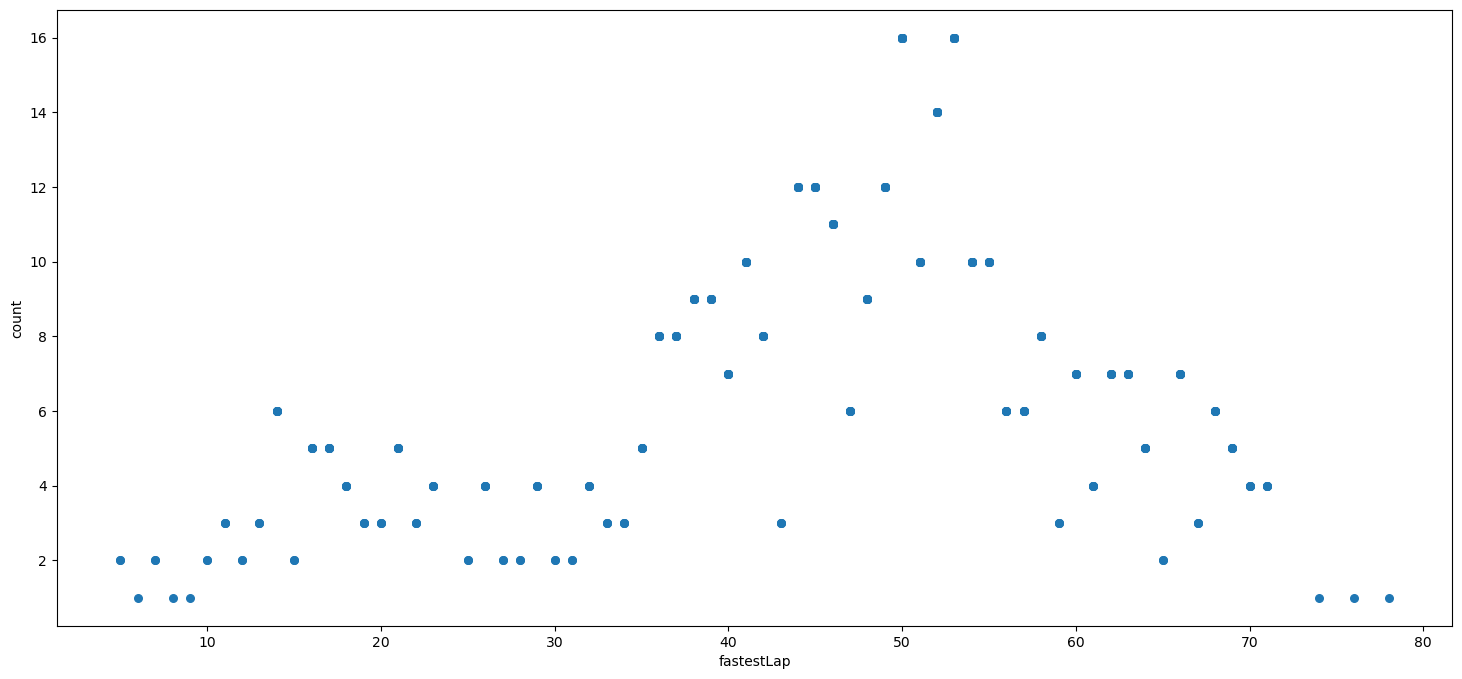

In [15]:
results_df=results_df[results_df['fastestLap']!='\\N']
results_df['fastestLap']=results_df['fastestLap'].astype(int)
result=results_df.loc[results_df['position']=='1']
result=result[result['fastestLap']!='\\N']
vc=result['fastestLap'].value_counts().to_frame().rename(columns={'fastestLap':'count'})
vc=vc.reset_index().rename(columns={'index':'fastestLap'})
merge1=pd.merge(result,vc,on='fastestLap')
merge1.sort_values(by='fastestLap').plot.scatter(x='fastestLap',y='count',s=30,figsize=(18,8))

**we can see that around lap 50 ,those are the fastest laps(in some races those are the final laps-> finishing all out!)**

# The progress of season races amount over the years 1950-2023

<Axes: xlabel='year', ylabel='number of races'>

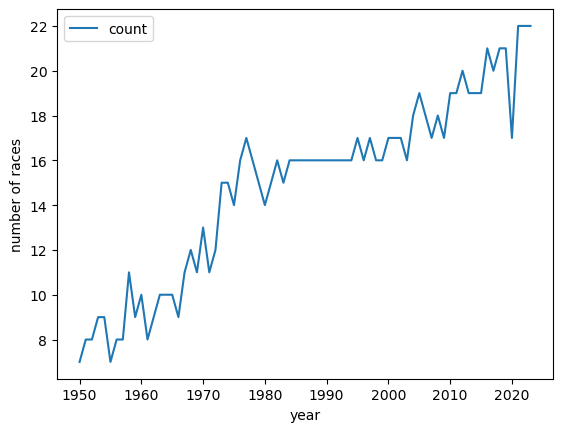

In [16]:
vc=races_df['year'].sort_values().value_counts().to_frame().rename(columns={'year':'count'})
vc=vc.reset_index().rename(columns={'index':'year'})
vc.sort_values(by='year').plot.line(x='year',y='count',ylabel='number of races')

we can see the increase over the years. In addition, in 2020 when the Corona virus started we can see that many races canceled.

# ML-linear regresion

In [17]:
results_df=results_df.dropna()

In [18]:
results_df.isna().sum()


resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [19]:
results_df=results_df[results_df['raceId']!='\\N']
results_df=results_df[results_df['grid']!='\\N']
results_df=results_df[results_df['position']!='\\N']
results_df=results_df[results_df['laps']!='\\N']
results_df=results_df[results_df['fastestLap']!='\\N']
results_df=results_df[results_df['rank']!='\\N']
results_df=results_df[results_df['fastestLapSpeed']!='\\N']



In [20]:
results_df['raceId']=results_df['raceId'].astype(int)
results_df['grid']=results_df['grid'].astype(int)
results_df['position']=results_df['position'].astype(int)
results_df['laps']=results_df['laps'].astype(int)
results_df['fastestLap']=results_df['fastestLap'].astype(int)
results_df['rank']=results_df['rank'].astype(int)
results_df['fastestLapSpeed']=results_df['fastestLapSpeed'].astype(float)




In [21]:
X = results_df[['grid','laps','fastestLap','rank','fastestLapSpeed','raceId']]
y=results_df['position']

In [22]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X = X_std * (1-0)+0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
mymodel = LinearRegression()

In [25]:
mymodel_fit = mymodel.fit(X_train,y_train)

In [26]:
y_prdict = mymodel_fit.predict(X_test)

In [27]:
results_df['position'].mean()

9.241379310344827

In [28]:
abs(y_test - y_prdict).mean()

2.3396396835276896

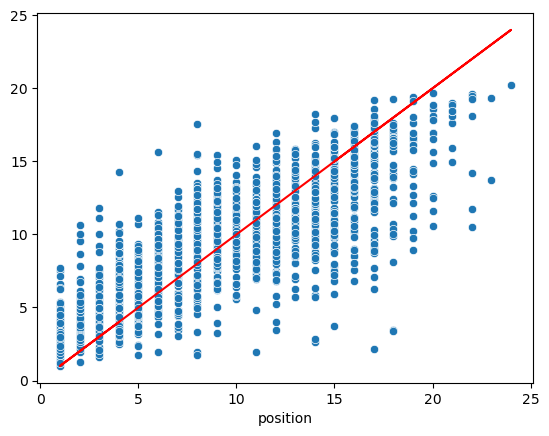

In [29]:
ax = sns.scatterplot(x=y_test, y=y_prdict)
ax.plot(y_test, y_test, 'r')

# ML-Desicion tree

In [30]:
mymodel2 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [32]:
mymodel2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [33]:
y_pred = mymodel2.predict(X_test)

In [34]:
(y_test == y_pred).mean()

0.1409937888198758

In [35]:
test_result = mymodel2.predict(X_test)

In [36]:
(y_test == test_result).mean()

0.1409937888198758

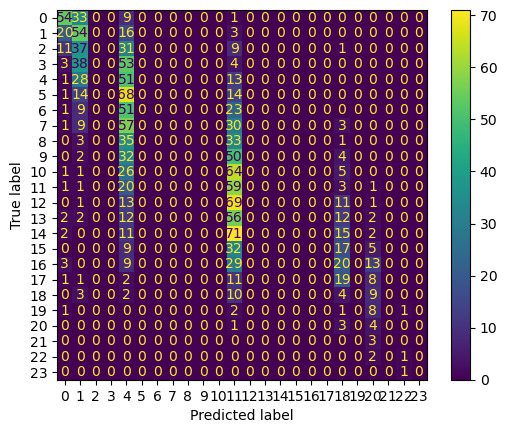

In [37]:
cm = confusion_matrix(y_test, test_result)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

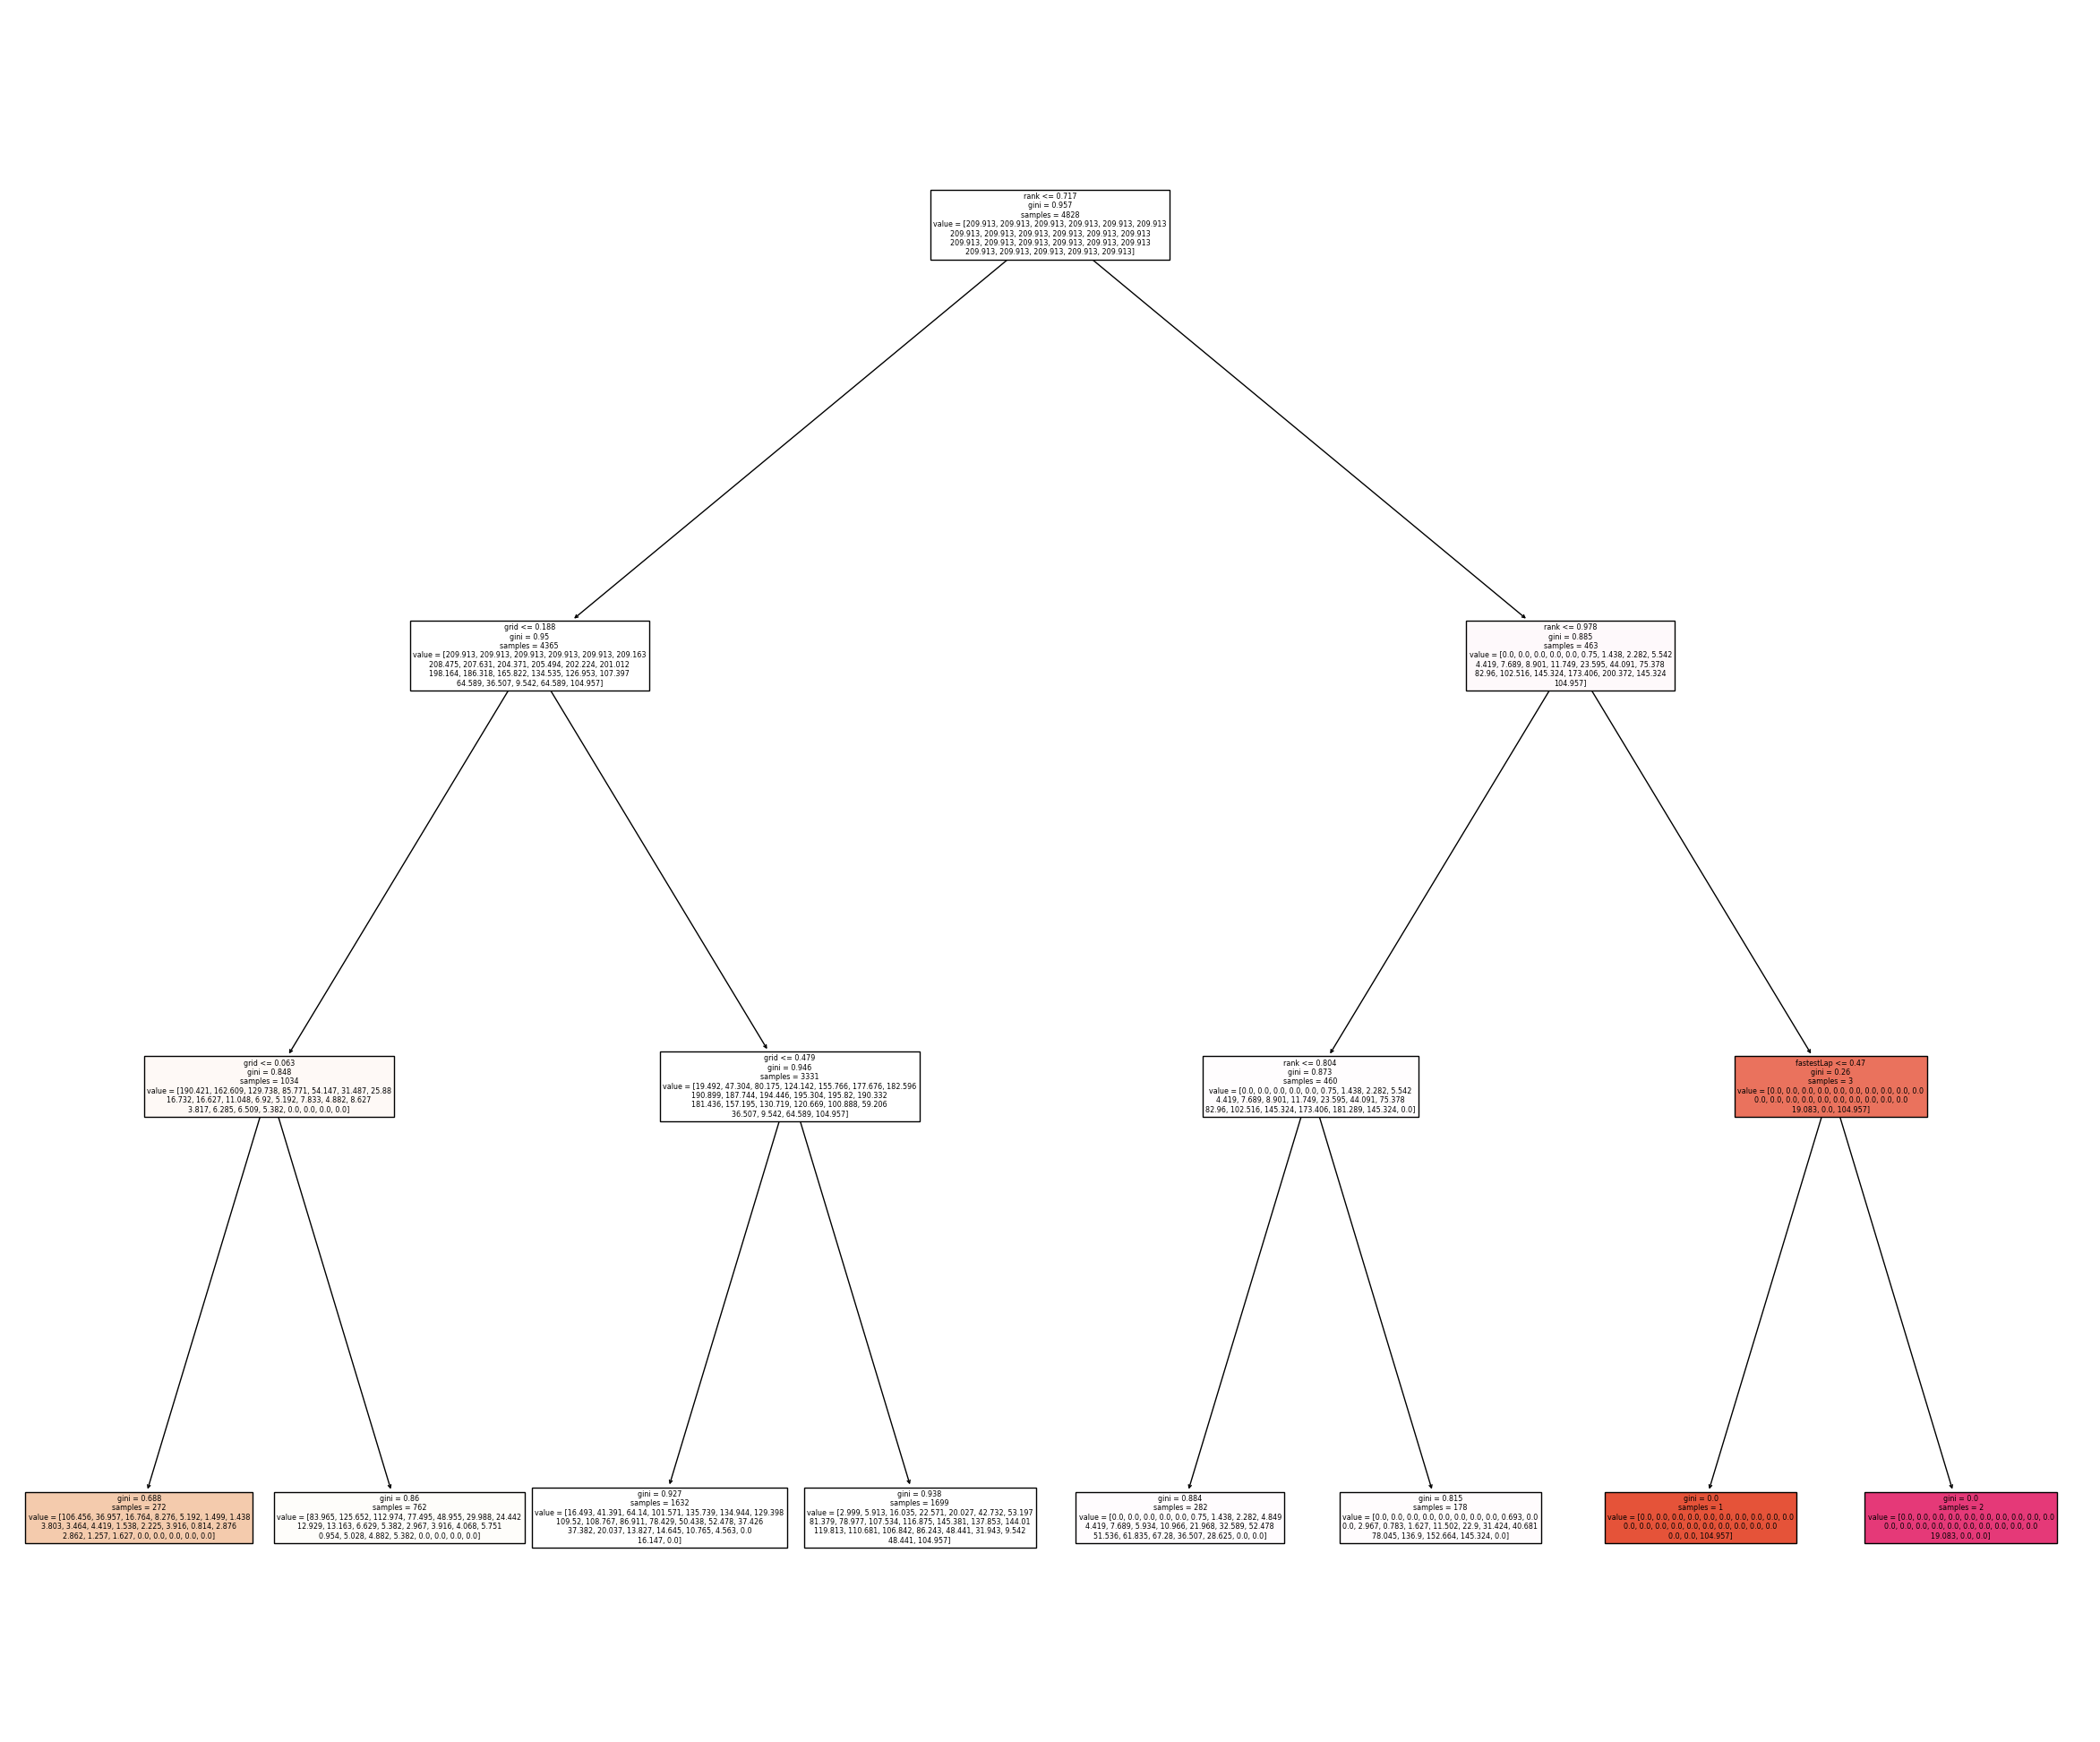

In [38]:
fig = plt.figure(figsize=(30,25))
tree.plot_tree(mymodel2,
               feature_names = X_train.columns,
               
               filled = True);